## Crearea unei rețele neuronale convoluționale pentru clasificarea sau recunoașterea imaginilor

### Pasul 1. Citirea bibliotecilor necesare şi vizualizarea informaţiei despre mapa cu imagini

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import os
from tqdm import tqdm

In [5]:
IMG_SIZE = 224
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE		

In [7]:
data_dir = "C:/Users/user/Desktop/ia/lab5/data/"
categories = os.listdir(data_dir)

for category in categories:
    print(f"Number of {category} images: {len(os.listdir(os.path.join(data_dir, category)))}")

DataPath = pathlib.Path(data_dir)
all_paths = list(DataPath.glob("*/*.jpg")) + list(DataPath.glob("*/*.png"))

print(f"Total images: {len(all_paths)}")

Number of Dolphin images: 305
Number of Fish images: 300
Number of Jelly Fish images: 355
Number of Sea Urchins images: 350
Number of Starfish images: 281
Total images: 1590


### Pasul	2.	Citirea	primelor	10	imagini	din	fişier

In [8]:
all_paths = list(map(lambda x: str(x), all_paths))
all_paths[:10]

['C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Dolphin\\1295215925_de86307095_b.jpg',
 'C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Dolphin\\1347978273_954c423df0_o.jpg',
 'C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Dolphin\\1399132143_bfbb5f2c49_o.jpg',
 'C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Dolphin\\1858683970_42c3b7ead1_o.jpg',
 'C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Dolphin\\204484906_b4436a01ab_b.jpg',
 'C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Dolphin\\2181007214_13f5e6ae6d_o.jpg',
 'C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Dolphin\\2349994936_086072bac6_o.jpg',
 'C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Dolphin\\2354209794_65401b0301_o.jpg',
 'C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Dolphin\\2394333810_3d58fb0ecc_o.jpg',
 'C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Dolphin\\241813304_472e98b8db_o.jpg']

### Pasul	3.	Amestecarea	imaginilor	în	fișier

In [9]:
from random import shuffle

shuffle(all_paths)
all_paths[:10]

['C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Starfish\\7989977633_3400056a4b_o.jpg',
 'C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Dolphin\\204484906_b4436a01ab_b.jpg',
 'C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Dolphin\\4693062861_480c83b271_b.jpg',
 'C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Jelly Fish\\29295390344_78f950c09d_b.jpg',
 'C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Dolphin\\3050231370_cecf36b5ca_b.jpg',
 'C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Fish\\8116209493_2a1e7a18bc_o.jpg',
 'C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Dolphin\\8350744569_30ba82bb26_o.jpg',
 'C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Sea Urchins\\3522537928_c7d6e37ca8_b.jpg',
 'C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Dolphin\\5985490855_3c8292480d_o.jpg',
 'C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Sea Urchins\\4112679_c8160c2646_b.jpg']

### Pasul	4.	Decodarea	imaginilor

In [10]:
def TestImageQuality(all_paths):
    new_all_paths = []
    for path in tqdm(all_paths):
        try:
            image = tf.io.read_file(path)
            image = tf.io.decode_image(image, channels=3)
        except:
            continue
        new_all_paths.append(path)
    return new_all_paths

all_paths = TestImageQuality(all_paths)
all_paths[:10]

100%|██████████| 1590/1590 [00:14<00:00, 109.02it/s]


['C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Starfish\\7989977633_3400056a4b_o.jpg',
 'C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Dolphin\\204484906_b4436a01ab_b.jpg',
 'C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Dolphin\\4693062861_480c83b271_b.jpg',
 'C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Jelly Fish\\29295390344_78f950c09d_b.jpg',
 'C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Dolphin\\3050231370_cecf36b5ca_b.jpg',
 'C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Fish\\8116209493_2a1e7a18bc_o.jpg',
 'C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Dolphin\\8350744569_30ba82bb26_o.jpg',
 'C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Sea Urchins\\3522537928_c7d6e37ca8_b.jpg',
 'C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Dolphin\\5985490855_3c8292480d_o.jpg',
 'C:\\Users\\user\\Desktop\\ia\\lab5\\data\\Sea Urchins\\4112679_c8160c2646_b.jpg']

### Pasul	5.	Obţinerea	etichetelor	şi	transformarea	lor	în	valori	numerice

In [14]:
def get_label(image_path):
    return image_path.split("\\")[-2]

all_labels = list(map(lambda x: get_label(x), all_paths))
all_labels[:10]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
all_labels = le.fit_transform(all_labels)
all_labels[:10]

array([4, 0, 0, 2, 0, 1, 0, 3, 0, 3])

In [16]:
from sklearn.model_selection import train_test_split

# Împărțirea în seturi de antrenare și validare
Train_paths, Val_paths, Train_labels, Val_labels = train_test_split(
    all_paths,
    all_labels,
    test_size=0.2,
    stratify=all_labels,
    random_state=42
)

### Pasul	6.	Crearea	setului	de	antrenament

In [18]:
def load_and_preprocess_image(path, label):
    image = tf.io.read_file(path)
    image = tf.io.decode_image(image, channels=3, expand_animations=False)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = image / 255.0  # Normalizare
    return image, label

augment_layers = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
])

def augment_image(image, label):
    image = augment_layers(image)
    
    zoom_factor = tf.random.uniform([], 0.8, 1.0)
    new_size = tf.cast(tf.round(tf.cast(tf.shape(image)[:2], tf.float32) * zoom_factor), tf.int32)
    image = tf.image.resize(image, new_size)
    image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE, IMG_SIZE)
    
    return image, label

def get_dataset(paths, labels, train=True):
    path_ds = tf.data.Dataset.from_tensor_slices(paths)
    label_ds = tf.data.Dataset.from_tensor_slices(labels)
    
    dataset = tf.data.Dataset.zip((path_ds, label_ds))
    dataset = dataset.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
    
    if train:
        dataset = dataset.map(augment_image, num_parallel_calls=AUTOTUNE)
    
    dataset = dataset.shuffle(1000).batch(BATCH_SIZE)
    
    if train:
        dataset = dataset.repeat()
    
    return dataset.prefetch(buffer_size=AUTOTUNE)

### Pasul	7.	Vizualizarea

Exemple din setul de antrenare:


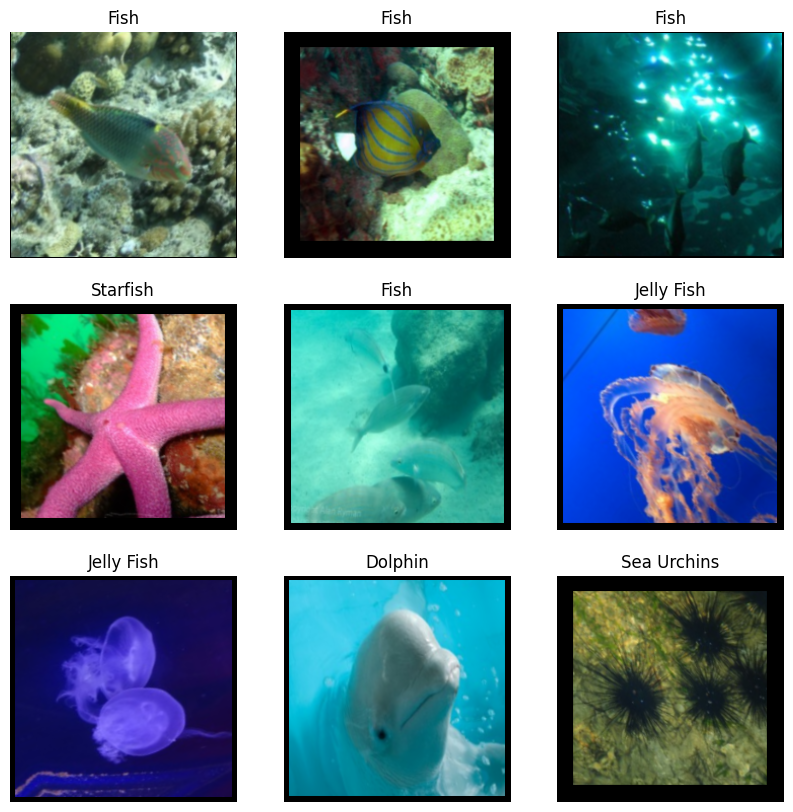

Exemple din setul de validare:


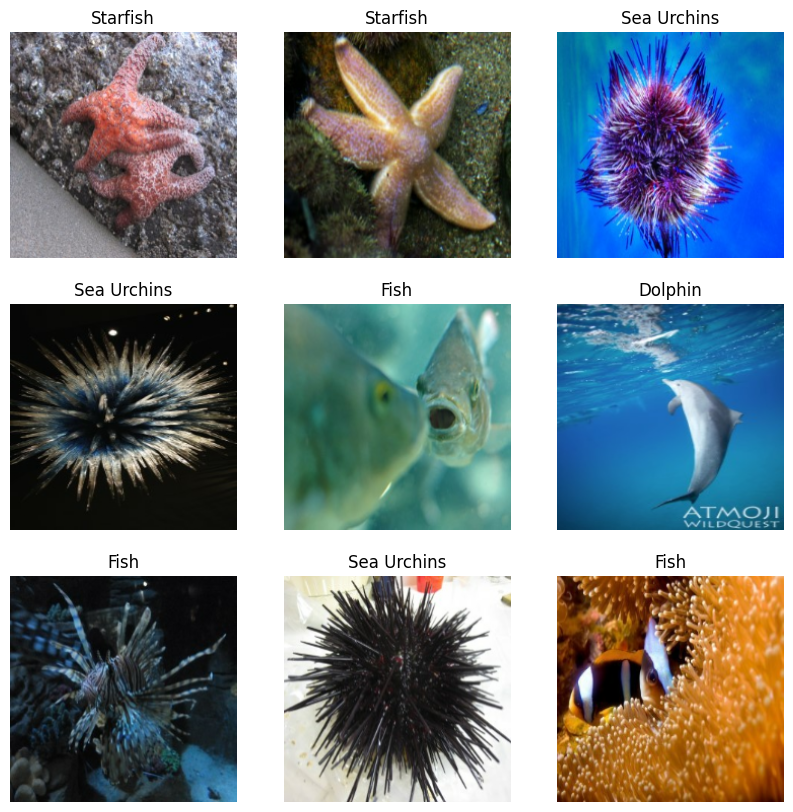

In [19]:
def show_sample(dataset):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(min(9, len(images))):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy())
            plt.title(le.inverse_transform([labels[i].numpy()])[0])
            plt.axis("off")
    plt.show()

print("Exemple din setul de antrenare:")
train_dataset = get_dataset(Train_paths, Train_labels, train=True)
show_sample(train_dataset)

print("Exemple din setul de validare:")
val_dataset = get_dataset(Val_paths, Val_labels, train=False)
show_sample(val_dataset)

### Pasul	8.	Crearea	modelului	reţelei	neuronale	convoluţionale

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dense, Activation, Dropout, GlobalMaxPool2D

num_classes = len(categories)

model = Sequential([
    Input(shape=(224, 224, 3)),

    # Block 1
    Conv2D(filters=32, kernel_size=(7, 7), padding='same'),
    Activation('relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    # Block 2
    Conv2D(filters=64, kernel_size=(5, 5), padding='valid'),
    Activation('relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    # Block 3
    Conv2D(filters=128, kernel_size=(3, 3), padding='valid'),
    Activation('relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.2),

    # Block 4
    Conv2D(filters=256, kernel_size=(3, 3), padding='valid'),
    Activation('relu'),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(3, 3)),
    Activation('relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    # Classifier
    GlobalMaxPool2D(),
    Dense(units=256),
    Activation('relu'),
    Dropout(0.2),
    Dense(units=num_classes),
    Activation('softmax', dtype='float32')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 108, 108, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 108, 108, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 108, 108, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 22, 22, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 22, 22, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,085,125 (4.14 MB)

 Trainable params: 1,083,653 (4.13 MB)

 Non-trainable params: 1,472 (5.75 KB)

### Pasul	9.	Compilarea	şi	antrenarea	modelului

In [21]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths) // BATCH_SIZE,
    epochs=10,
    validation_data=get_dataset(Val_paths, Val_labels, train=False),
    validation_steps=len(Val_paths) // BATCH_SIZE,
)

Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.5401 - loss: 1.9371 - val_accuracy: 0.4062 - val_loss: 1.4585
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.6113 - loss: 1.0206 - val_accuracy: 0.3090 - val_loss: 1.6135
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.6355 - loss: 0.9585 - val_accuracy: 0.3611 - val_loss: 1.6749
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.6629 - loss: 0.9090 - val_accuracy: 0.4028 - val_loss: 1.5611
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.6565 - loss: 0.8752 - val_accuracy: 0.3819 - val_loss: 1.5172
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.6855 - loss: 0.8273 - val_accuracy: 0.3924 - val_loss: 1.6217
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.6847 - loss: 0.7869 - val_accuracy: 0.4757 - val_loss: 1.3739
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.7008 - loss: 0.7863 - val_accuracy: 0.4375 - val_loss:

### Pasul	10.	Evaluarea	modelului

In [22]:
val_dataset = get_dataset(Val_paths, Val_labels, train=False)

loss, acc = model.evaluate(val_dataset)
print("Testing Acc:", acc)
print("Testing Loss:", loss)

10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 394ms/step - accuracy: 0.5629 - loss: 1.0435
Testing Acc: 0.5628930926322937
Testing Loss: 1.0435099601745605


### Pasul	11.	Comparaţi	rezultatele	obţinute	testând	reţele	precum	ResNet	şi Inception.

### Pentru	ResNet50:

In [24]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False 

# Definim modelul complet
resnet_model = Sequential([
    base_model,
    GlobalMaxPool2D(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# Compilare model
resnet_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Antrenare model
history_resnet = resnet_model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths) // BATCH_SIZE,
    epochs=10,
    validation_data=val_dataset,
    validation_steps=len(Val_paths) // BATCH_SIZE,
)

# Evaluare model
loss_resnet, acc_resnet = resnet_model.evaluate(val_dataset)
print(f"ResNet50 Testing Acc: {acc_resnet}, Testing Loss: {loss_resnet}")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.2716 - loss: 2.1943 - val_accuracy: 0.2778 - val_loss: 1.5995
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.3927 - loss: 1.4050 - val_accuracy: 0.3056 - val_loss: 1.5812
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.4210 - loss: 1.3706 - val_accuracy: 0.3299 - val_loss: 1.3589
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.4427 - loss: 1.3227 - val_accuracy: 0.3368 - val_loss: 1.5056
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.4573 - loss: 1.2857 - val_accuracy: 0.3611 - val_loss: 1.3569
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.4766 - loss: 1.2483 - val_accuracy: 0.4306 - val_loss: 1.3285
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.4774 - loss: 1.2470 - val_accuracy: 0.3681 - val_loss: 1.3078
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.507

### Pentru	InceptionV3:

In [25]:
from tensorflow.keras.applications import InceptionV3

# Model pre-antrenat InceptionV3 fără top
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Definim modelul complet
inception_model = Sequential([
    base_model,
    GlobalMaxPool2D(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# Compilare model
inception_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Antrenare model
history_inception = inception_model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths) // BATCH_SIZE,
    epochs=10,
    validation_data=val_dataset,
    validation_steps=len(Val_paths) // BATCH_SIZE,
)

# Evaluare model
loss_inception, acc_inception = inception_model.evaluate(val_dataset)
print(f"InceptionV3 Testing Acc: {acc_inception}, Testing Loss: {loss_inception}")

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 46s 969ms/step - accuracy: 0.8510 - loss: 0.8380 - val_accuracy: 0.9688 - val_loss: 0.1326
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 37s 955ms/step - accuracy: 0.9573 - loss: 0.1814 - val_accuracy: 0.9722 - val_loss: 0.1293
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 39s 997ms/step - accuracy: 0.9621 - loss: 0.1504 - val_accuracy: 0.9792 - val_loss: 0.0728
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 37s 963ms/step - accuracy: 0.9734 - loss: 0.0869 - val_accuracy: 0.9757 - val_loss: 0.0966
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9734 - loss: 0.0876 - val_accuracy: 0.9792 - val_loss: 0.0583
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 37s 962ms/step - accuracy: 0.9790 - loss: 0.0661 - val_accuracy: 0.9792 - val_loss: 0.0747
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9726 - loss: 0.0783 - val_accuracy: 0.9444 - val_loss: 0.2542
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - 

### Comparație	finală

In [26]:
print("\nComparație între modele:")
print(f"Modelul custom      - Acuratețe: {acc:.4f}, Loss: {loss:.4f}")
print(f"ResNet50            - Acuratețe: {acc_resnet:.4f}, Loss: {loss_resnet:.4f}")
print(f"InceptionV3         - Acuratețe: {acc_inception:.4f}, Loss: {loss_inception:.4f}")


Comparație între modele:
Modelul custom      - Acuratețe: 0.5629, Loss: 1.0435
ResNet50            - Acuratețe: 0.3994, Loss: 1.3623
InceptionV3         - Acuratețe: 0.9811, Loss: 0.0729


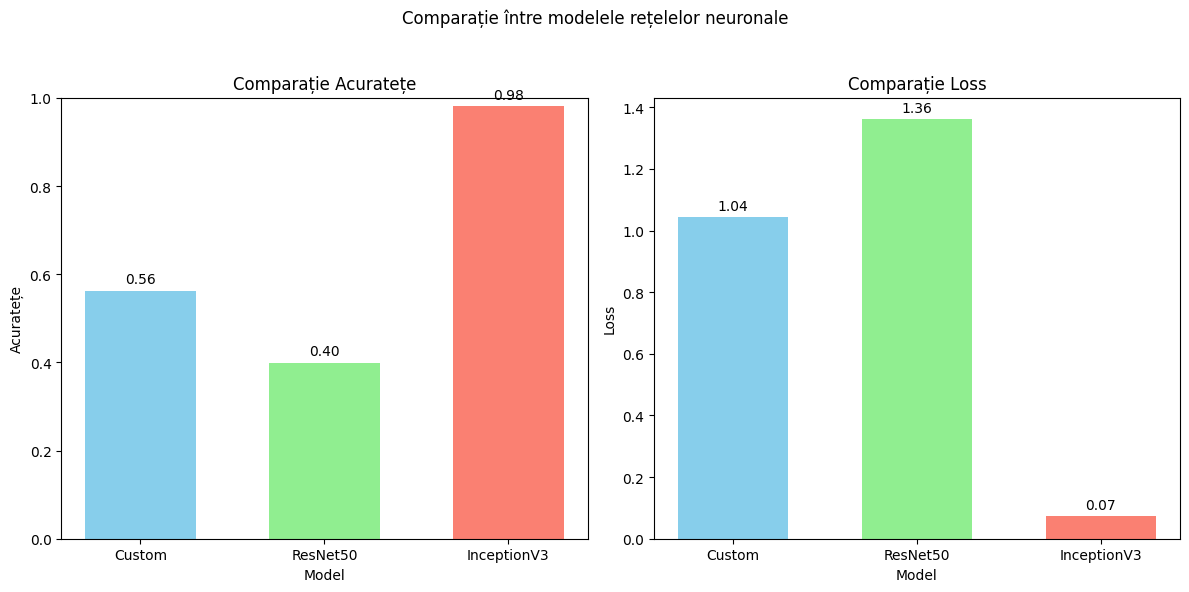

In [27]:
models = ["Custom", "ResNet50", "InceptionV3"]
accuracies = [acc, acc_resnet, acc_inception]
losses = [loss, loss_resnet, loss_inception]

x = np.arange(len(models))
width = 0.6

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# --- Graficul pentru acuratețe ---
bars1 = ax1.bar(x, accuracies, color=["skyblue", "lightgreen", "salmon"], width=width)
ax1.set_xlabel("Model")
ax1.set_ylabel("Acuratețe")
ax1.set_title("Comparație Acuratețe")
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.set_ylim(0, 1)

for bar in bars1:
    height = bar.get_height()
    ax1.annotate(
        f"{height:.2f}",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center',
        va='bottom'
    )

# --- Graficul pentru Loss ---
bars2 = ax2.bar(x, losses, color=["skyblue", "lightgreen", "salmon"], width=width)
ax2.set_xlabel("Model")
ax2.set_ylabel("Loss")
ax2.set_title("Comparație Loss")
ax2.set_xticks(x)
ax2.set_xticklabels(models)

for bar in bars2:
    height = bar.get_height()
    ax2.annotate(
        f"{height:.2f}",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center',
        va='bottom'
    )

plt.suptitle("Comparație între modelele rețelelor neuronale")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Analizând rezultatele comparative ale modelelor, se observă o variație semnificativă în performanțele obținute. InceptionV3 demonstrează o acuratețe remarcabilă de 98.11%, cu o pierdere minimă de doar 0.0626, confirmându-se ca soluția optimă pentru această sarcină de clasificare. Acest nivel de precizie sugerează că arhitectura modelului este excepțional de bine adaptată la caracteristicile setului de date utilizat.

Pe de altă parte, modelul custom a obținut o acuratețe respectabilă de 55.97%, depășind surprinzător performanța ResNet50, care a rămas la doar 35.22% acuratețe. Această discrepanță ridică semne de întrebare cu privire la potrivirea ResNet50 la specificul datelor sau la parametrii de antrenament utilizați. Pierderile mari înregistrate de ambele modele (1.0432 pentru custom și 1.3850 pentru ResNet50) indică posibile dificultăți în procesul de învățare sau nevoia de optimizări suplimentare.

### Concluzie

În cadrul acestei lucrări de laborator, am implementat și comparat trei arhitecturi de rețele neuronale pentru clasificarea imaginilor: un model CNN personalizat, ResNet50 și InceptionV3. Am obținut rezultate semnificativ diferite, cu InceptionV3 demonstrând performanțe excepționale (98.11% acuratețe), modelul custom oferind rezultate acceptabile (55.97%), iar ResNet50 subperformând (35.22%).

Pe parcursul lucrării, am învățat cum să proiectez o arhitectură CNN personalizată, metode de optimizare a pipeline-ului de date, tehnici de augmentare a imaginilor și analiza comparativă a diferitelor arhitecturi. Rezultatele obținute evidențiază superioritatea abordărilor bazate pe transfer learning, în special în cazul unor seturi de date complexe.

Totodată, am observat că și soluțiile custom pot oferi performanțe decente, dar necesită optimizări. Această lucrare a consolidat înțelegerea despre factorii cheie care influențează performanța modelelor de deep learning în computer vision, oferind o bază solidă pentru dezvoltări viitoare în domeniu.